In [1]:
options(jupyter.plot_mimetypes = c("image/png"))

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

## For loading Arial font for publication
# library(extrafont)

# font_import(pattern = "Arial", prompt = FALSE)
# loadfonts(device = "pdf")

In [2]:
# Read the master df
master_csv <- "resources/recessive.cross_studies_comparison.csv"
master_df <- read.csv(file = master_csv, header = TRUE, sep = ",", stringsAsFactors = FALSE)

In [3]:
# Define custom colors for ACMG tiers
custom_colors <- c(
  "tier_1" = "#6F9BFF", 
  "tier_2" = "#E2695F", 
  "tier_3" = "#71EDBC", 
  "tier_4" = "#FEE54C", 
  "grey" = "#333333", 
  "light_grey" = "#CCCCCC"
)

# Comparison on ACF

In [4]:
acf_df <- master_df %>% 
    select(gene, tier_hkgi, at_risks_couples_rate_hkgi, actual_at_risks_couples_rate_hkgi) %>% 
    arrange(desc(actual_at_risks_couples_rate_hkgi))

acf_df$gene <- factor(acf_df$gene, levels = acf_df$gene)

acf_df <- acf_df %>% 
    mutate(tier_hkgi = ifelse(tier_hkgi == "tier_3_xlink", "tier_3", tier_hkgi))

In [5]:
high_freq_df <- acf_df %>% 
    filter(acf_df$actual_at_risks_couples_rate_hkgi > 0.01)

moderate_freq_df <- head(acf_df %>% 
    filter(acf_df$actual_at_risks_couples_rate_hkgi <= 0.01), 13
)

moderate_freq_df$tier_hkgi <- factor(
    moderate_freq_df$tier_hkgi, 
    levels = c("tier_1", "tier_2", "tier_3", "tier_4")
)

moderate_freq_df <- moderate_freq_df %>% 
    arrange(tier_hkgi, desc(actual_at_risks_couples_rate_hkgi))

In [6]:
head(moderate_freq_df)

,gene,tier_hkgi,at_risks_couples_rate_hkgi,actual_at_risks_couples_rate_hkgi
,<fct>,<fct>,<dbl>,<dbl>
1,HBA1/HBA2,tier_1,0.0092511921,0.007332402
2,HBB,tier_1,0.0009152254,0.000698324
3,CD36,tier_2,0.0027743776,0.004888268
4,FLG,tier_2,0.0041984682,0.001745810
5,SERPINB7,tier_2,0.0008238445,0.001745810
6,SLC26A4,tier_2,0.0003851055,0.001396648


In [7]:
# Convert high_freq_df to long format
high_freq_long <- high_freq_df %>%
  pivot_longer(
    cols = c(at_risks_couples_rate_hkgi, actual_at_risks_couples_rate_hkgi),  # Replace with actual column names
    names_to = "src",
    values_to = "rate"
  ) %>% 
  mutate(tier_hkgi = ifelse(src == "at_risks_couples_rate_hkgi", "random", tier_hkgi))

high_freq_long$src <- factor(high_freq_long$src, levels = c("at_risks_couples_rate_hkgi", "actual_at_risks_couples_rate_hkgi"))

high_freq_long

gene,tier_hkgi,src,rate
<fct>,<chr>,<fct>,<dbl>
G6PD,random,at_risks_couples_rate_hkgi,0.07515747
G6PD,tier_3,actual_at_risks_couples_rate_hkgi,0.06808659
GJB2,random,at_risks_couples_rate_hkgi,0.05012770
GJB2,tier_2,actual_at_risks_couples_rate_hkgi,0.05167598


In [8]:
# Convert moderate_freq_df to long format
moderate_freq_long <- moderate_freq_df %>%
  pivot_longer(
    cols = c(at_risks_couples_rate_hkgi, actual_at_risks_couples_rate_hkgi),  # Replace with actual column names
    names_to = "src",
    values_to = "rate"
  ) %>% 
  mutate(tier_hkgi = ifelse(src == "at_risks_couples_rate_hkgi", "random", tier_hkgi))

# moderate_freq_long$acmg_tier_hkgi <- factor(moderate_freq_long$acmg_tier_hkgi, levels = moderate_freq_long$acmg_tier_hkgi)
moderate_freq_long$gene <- factor(moderate_freq_long$gene, levels = moderate_freq_df$gene)

moderate_freq_long$tier_hkgi <- factor(
  moderate_freq_long$tier_hkgi, 
  levels = c("random", "1", "2", "3", "4")
)

moderate_freq_long$src <- factor(moderate_freq_long$src, levels = c("at_risks_couples_rate_hkgi", "actual_at_risks_couples_rate_hkgi"))

moderate_freq_long <- moderate_freq_long %>% 
  arrange(gene, tier_hkgi, desc(rate))

moderate_freq_long

gene,tier_hkgi,src,rate
<fct>,<fct>,<fct>,<dbl>
HBA1/HBA2,random,at_risks_couples_rate_hkgi,9.251192e-03
HBA1/HBA2,1,actual_at_risks_couples_rate_hkgi,7.332402e-03
HBB,random,at_risks_couples_rate_hkgi,9.152254e-04
HBB,1,actual_at_risks_couples_rate_hkgi,6.983240e-04
CD36,random,at_risks_couples_rate_hkgi,2.774378e-03
CD36,2,actual_at_risks_couples_rate_hkgi,4.888268e-03
FLG,random,at_risks_couples_rate_hkgi,4.198468e-03
FLG,2,actual_at_risks_couples_rate_hkgi,1.745810e-03
SERPINB7,random,at_risks_couples_rate_hkgi,8.238445e-04


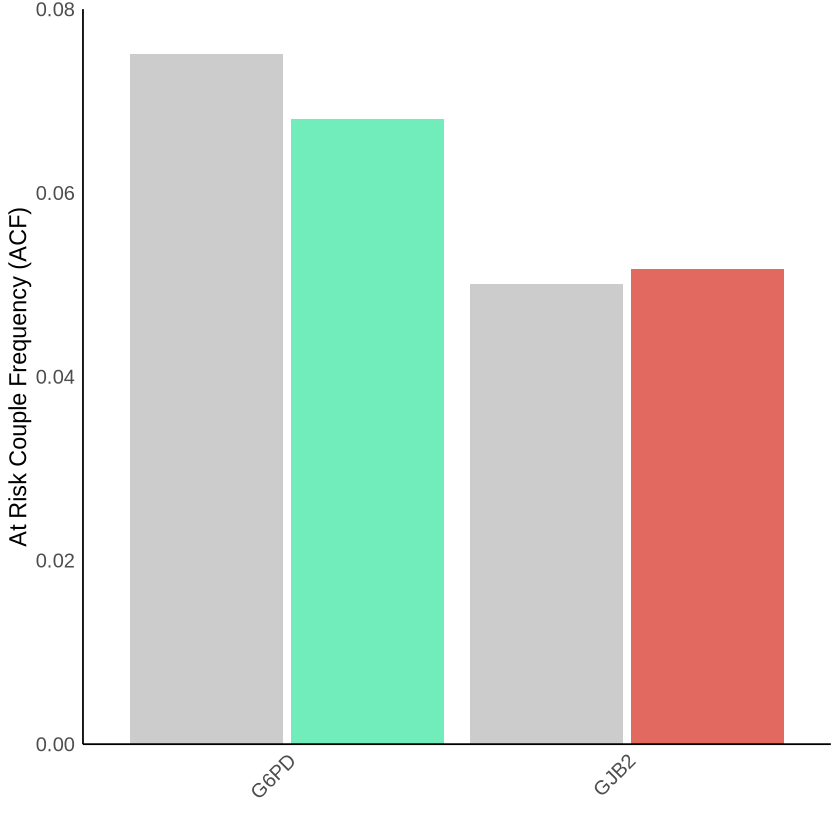

In [9]:
# plot grouped bar chart
p1 <- ggplot(high_freq_long, aes(x = gene, y = rate, fill = tier_hkgi)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.95)) +  # Group bars side by side
  labs(
    title = "",
    x = "",
    y = "At Risk Couple Frequency (ACF)"
  ) +
  scale_y_continuous(
    breaks = seq(0, 0.08, by = 0.02),  # Set y-axis ticks at 5% intervals
    limits = c(0, 0.08), 
    expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) +
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
      # Font sizes for publication
      # axis.text.y = element_text(size = 6),
      # axis.text.x = element_text(angle = 45, size = 7, hjust = 1),
      # axis.title.y = element_text(size = 7),
      # axis.title.x = element_text(size = 7),
      # Font sizes for notebook
      axis.text.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, size = 12, hjust = 1),
      axis.title.y = element_text(size = 14),
      axis.title.x = element_text(size = 14),
      plot.title = element_blank(),
      panel.grid = element_blank(), 
      axis.line = element_line(color = "black"),
      legend.position = 'none'
  ) +
  scale_fill_manual(
    labels = c(
      "random" = "Random mating estimate", 
      "tier_1" = "Measured, tier 1", 
      "tier_2" = "Measured, tier 2", 
      "tier_3" = "Measured, tier 3", 
      "tier_4" = "Measured, tier 4"
    ), 
    values = c(
      "random" = custom_colors[["light_grey"]], 
      "tier_1" = custom_colors[["tier_1"]], 
      "tier_2" = custom_colors[["tier_2"]], 
      "tier_3" = custom_colors[["tier_3"]], 
      "tier_4" = custom_colors[["tier_4"]]
    )
  )

p1

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


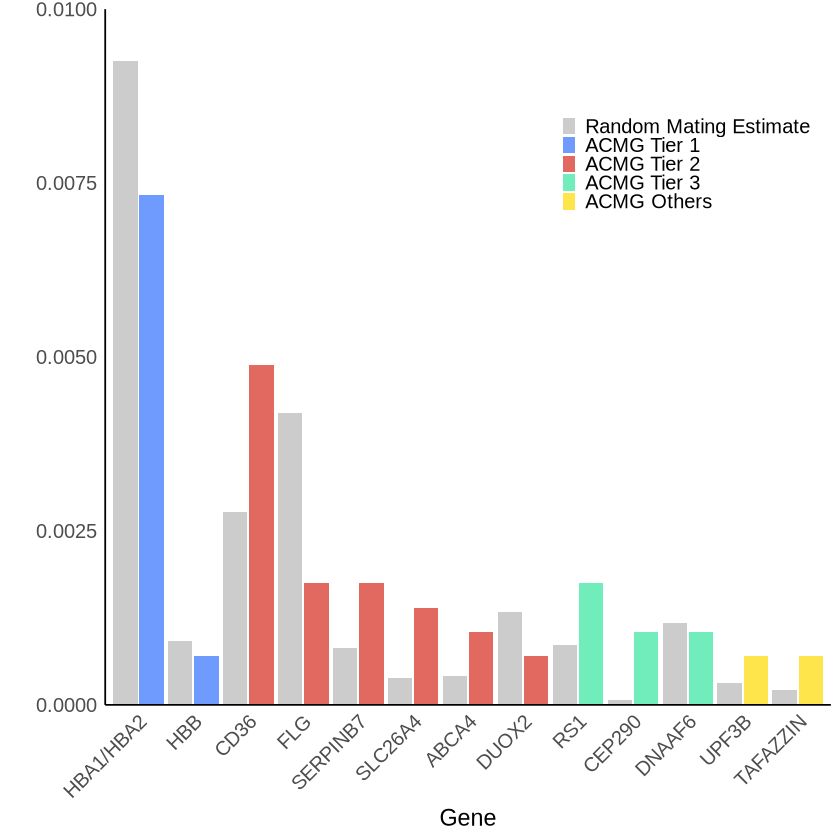

In [10]:
# plot grouped bar chart
p2 <- ggplot(moderate_freq_long, aes(x = gene, y = rate, fill = tier_hkgi)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.95)) +  # Group bars side by side
  labs(
    title = "",
    x = "Gene",
    y = "", 
    fill = ""
  ) +
  scale_y_continuous(
    breaks = seq(0, 0.01, by = 0.0025),  # Set y-axis ticks at 5% intervals
    limits = c(0, 0.01), 
    expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) +
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
      # Font sizes for publication
      # axis.text.y = element_text(size = 6),
      # axis.text.x = element_text(angle = 45, size = 7, hjust = 1),
      # axis.title.y = element_text(size = 7),
      # axis.title.x = element_text(size = 7),
      # legend.title = element_text(size = 7),
      # legend.text = element_text(size = 6),
      # Font sizes for notebook
      axis.text.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, size = 12, hjust = 1),
      axis.title.y = element_text(size = 14),
      axis.title.x = element_text(size = 14),
      legend.title = element_text(size = 14),
      legend.text = element_text(size = 12),
      plot.title = element_blank(),
      panel.grid = element_blank(), 
      axis.line = element_line(color = "black"), 
      
      legend.key.size = unit(0.3, "cm"),
      legend.position = c(.8, .8)  # Position the legend
  ) +
  scale_fill_manual(
    labels = c(
      "random" = "Random Mating Estimate", 
      "1" = "ACMG Tier 1", 
      "2" = "ACMG Tier 2", 
      "3" = "ACMG Tier 3", 
      "4" = "ACMG Others"
    ), 
    values = c(
      "random" = custom_colors[["light_grey"]], 
      "1" = custom_colors[["tier_1"]], 
      "2" = custom_colors[["tier_2"]], 
      "3" = custom_colors[["tier_3"]], 
      "4" = custom_colors[["tier_4"]]
    )
  )

p2

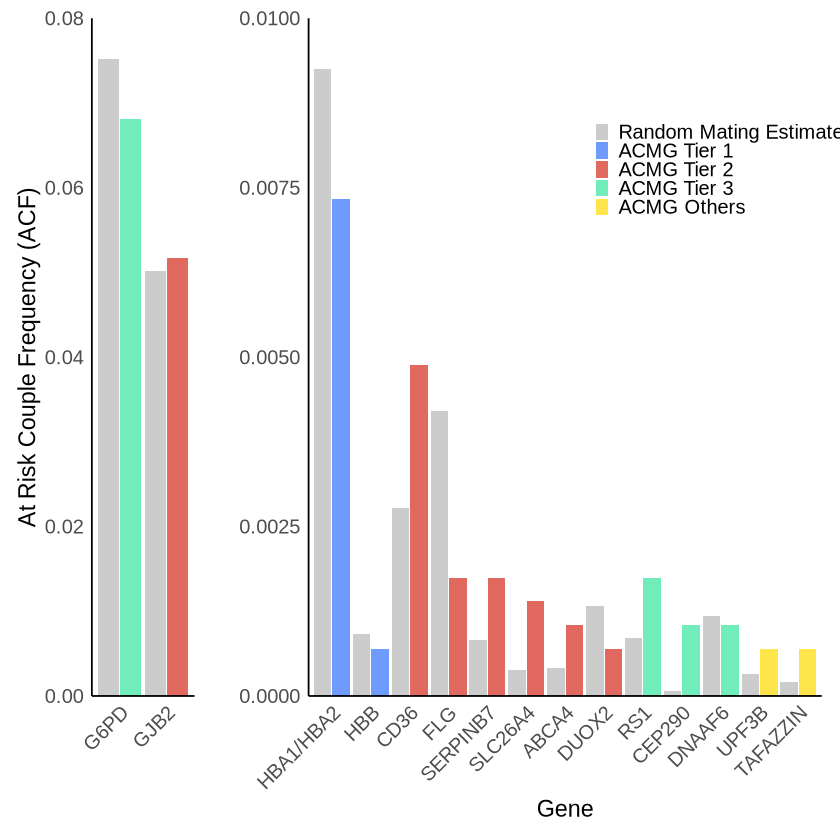

In [11]:
acf_p <- p1 + p2 + plot_layout(widths = c(1, 5))

acf_p

In [12]:
# # Save the combined plot
# ggsave(
#     filename = "results/secondary/recessive/supplementary/acf.pdf", 
#     plot = acf_p, 
#     width = 176, height = 65, 
#     units = "mm", dpi = 600
# )